In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metrics_df = pd.read_csv('metrics_df.csv')

In [10]:
metrics_df

,company_linking,year,betweenness,closeness,degree,eigenvector
0,6930,1960,0.000000,1.000000,1.000000,1.000000e+00
1,24708,1960,0.000000,1.000000,1.000000,1.000000e+00
2,80806,1960,0.000000,1.000000,1.000000,1.000000e+00
3,6930,1961,0.000000,1.000000,1.000000,1.000000e+00
4,24708,1961,0.000000,1.000000,1.000000,1.000000e+00
...,...,...,...,...,...,...
405336,3905369,2025,0.000000,0.211097,0.000149,1.886018e-09
405337,3906385,2025,38509.770310,0.184001,0.000521,1.089684e-12
405338,3906438,2025,13585.634959,0.174355,0.000223,2.700265e-11
405339,3907518,2025,25.562353,0.202643,0.000819,2.821162e-09


In [8]:
metrics_df['year'] = pd.to_datetime(metrics_df['year']).dt.year

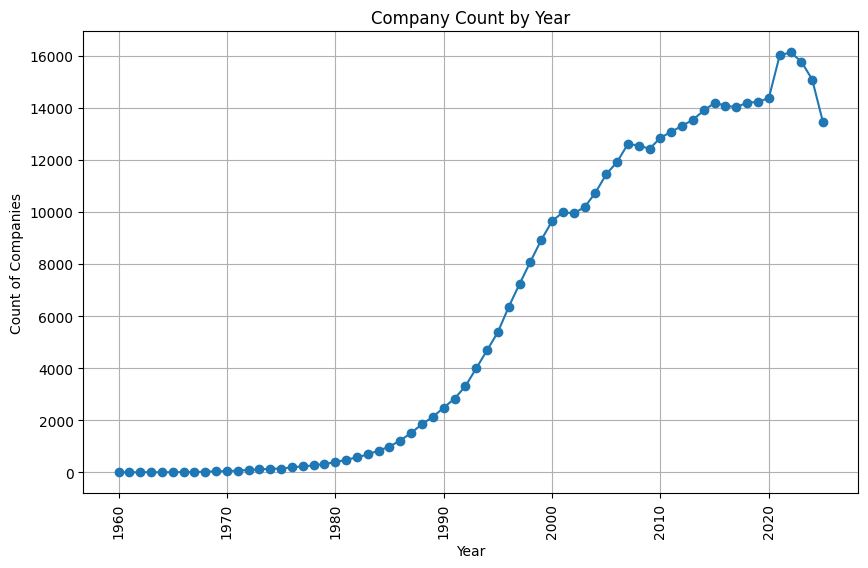

In [9]:
# Group by year and count the 'company_linking'
yearly_counts = metrics_df.groupby('year')['company_linking'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count of Companies')
plt.title('Company Count by Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [12]:
# Normalize betweenness

def normalize_betweenness(group):
    n = len(group)
    norm_factor = ((n - 1) * (n - 2) / 2) if n > 2 else 1
    group = group.copy()
    group['betweenness_normalized'] = group['betweenness'] / norm_factor
    return group

metrics_df = metrics_df.groupby('year').apply(normalize_betweenness)

metrics_df = metrics_df.reset_index(drop=True)

metrics_df

/var/folders/87/l9v54pbn62z8ml1qb5cc92ch0000gp/T/ipykernel_53214/798849403.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_df = metrics_df.groupby('year').apply(normalize_betweenness)


,company_linking,year,betweenness,closeness,degree,eigenvector,betweenness_normalized
0,6930,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
1,24708,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
2,80806,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
3,6930,1961,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
4,24708,1961,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
405336,3905369,2025,0.000000,0.211097,0.000149,1.886018e-09,0.000000e+00
405337,3906385,2025,38509.770310,0.184001,0.000521,1.089684e-12,4.269889e-04
405338,3906438,2025,13585.634959,0.174355,0.000223,2.700265e-11,1.506349e-04
405339,3907518,2025,25.562353,0.202643,0.000819,2.821162e-09,2.834304e-07


### Create Connectivity Variable

In [21]:
metrics_df['connectivity'] = metrics_df['closeness']*0.2 + metrics_df['degree']*0.1 + metrics_df['eigenvector']*0.4 + metrics_df['betweenness_normalized']*0.3

In [22]:
metrics_df

,company_linking,year,betweenness,closeness,degree,eigenvector,betweenness_normalized,connectivity
0,6930,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.700000
1,24708,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.700000
2,80806,1960,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.700000
3,6930,1961,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.700000
4,24708,1961,0.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.700000
...,...,...,...,...,...,...,...,...
405336,3905369,2025,0.000000,0.211097,0.000149,1.886018e-09,0.000000e+00,0.042234
405337,3906385,2025,38509.770310,0.184001,0.000521,1.089684e-12,4.269889e-04,0.036980
405338,3906438,2025,13585.634959,0.174355,0.000223,2.700265e-11,1.506349e-04,0.034938
405339,3907518,2025,25.562353,0.202643,0.000819,2.821162e-09,2.834304e-07,0.040611
